In [1]:
import numpy as np
import pandas as pd
from scipy import io

In [2]:
# Load data
y_tr = pd.read_csv("../data/tox21_labels_train.csv.gz", index_col=0, compression="gzip")
x_tr_dense = pd.read_csv("../data/tox21_dense_train.csv.gz", index_col=0, compression="gzip")
x_tr_sparse = io.mmread("../data/tox21_sparse_train.mtx.gz").tocsc()

y_te = pd.read_csv("../data/tox21_labels_test.csv.gz", index_col=0, compression="gzip")
x_te_dense = pd.read_csv("../data/tox21_dense_test.csv.gz", index_col=0, compression="gzip")
x_te_sparse = io.mmread("../data/tox21_sparse_test.mtx.gz").tocsc()

In [3]:
# show the shape of the first row of the dense matrix
x_tr_dense.iloc[0].shape


(801,)

In [4]:
# show the name of the first row of the dense matrix
x_tr_dense.iloc[0].name

'NCGC00178831-03'

In [9]:
# get the SMILES of the first row of the dense matrix
import requests

compound_id = "NCGC00178831-03"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_id}/property/IsomericSMILES/TXT"

response = requests.get(url)
if response.status_code == 200:
    smiles = response.text.strip()
    print(f"SMILES for {compound_id}: {smiles}")
else:
    print(f"Error retrieving SMILES for {compound_id}")

SMILES for NCGC00178831-03: C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=CC2=NC3=C(C=CC(=C3)N)C=C21)N.[Cl-]


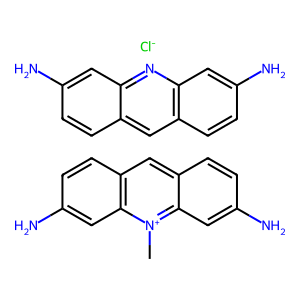

In [10]:
# draw the molecule
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [13]:
import requests
from rdkit import Chem
from rdkit.Chem import Draw
import time

def get_smiles(compound_id):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{compound_id}/property/IsomericSMILES/TXT"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    else:
        return None

# Create a new column 'SMILES' in x_tr_dense
x_tr_dense['SMILES'] = ''

# Fetch SMILES for each compound
for idx, compound_id in enumerate(x_tr_dense.index):
    smiles = get_smiles(compound_id)
    x_tr_dense.at[compound_id, 'SMILES'] = smiles
    print(f"Retrieved SMILES for {compound_id}: {smiles}")
    time.sleep(0.1)

# Display the first few rows of the updated dataframe
x_tr_dense.head()

Retrieved SMILES for NCGC00178831-03: C[N+]1=C2C=C(C=CC2=CC3=C1C=C(C=C3)N)N.C1=CC(=CC2=NC3=C(C=CC(=C3)N)C=C21)N.[Cl-]


KeyboardInterrupt: 

The y frames: 
for each of the 12 output features, theres' 11 NaNs and one binary label

In [20]:
# show first row of y train
y_tr.head(50)

,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
NCGC00178831-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00166114-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00263563-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
NCGC00013058-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NCGC00167516-01,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCGC00018301-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NCGC00249897-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NCGC00016000-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
NCGC00181091-01,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCGC00094089-01,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
